# Managing flowsheets

### Retrieve any Unit, Stream or System object by ID

`find` has access to Flowsheet objects where all BioSTEAM objects are registered. The main flowsheet defaults to the 'Default' flowsheet:

In [1]:
import biosteam as bst
bst.find

<MainFlowsheet: default>

Find a Unit object:

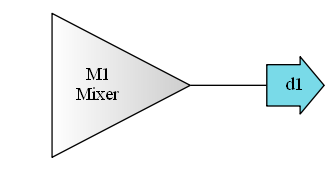

Mixer: M1
ins...
[0] missing stream
[1] missing stream
outs...
[0] d1
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0


In [2]:
bst.Stream.species = bst.Species('Water', 'Ethanol')
unit = bst.units.Mixer('M1')
bst.find('M1')

Find a Stream object:

In [3]:
bst.find('d1')

Stream: d1  from  Mixer-M1
 phase: 'l', T: 298.15 K, P: 101325 Pa
 flow: 0


All Unit objects can be viewed as a diagram:

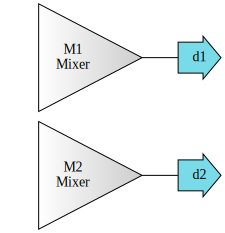

In [4]:
bst.units.Mixer('M2')
bst.find.diagram()

All Stream, Unit, and System objects are stored as Register objects in `find`:

In [5]:
bst.find.stream

Register:
 <Stream: d1>
 <Stream: d2>

In [6]:
bst.find.unit

Register:
 <Mixer: M1>
 <Mixer: M2>

In [7]:
bst.find.system

Register: (Empty)

Access items in a register:

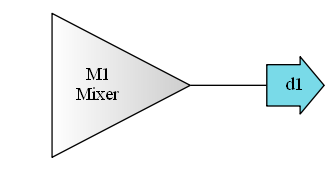

Mixer: M1
ins...
[0] missing stream
[1] missing stream
outs...
[0] d1
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0


In [8]:
bst.find.unit.M1

### Switch between flowsheets

A new flowsheet may be created and set as the main flowsheet:

In [9]:
bst.find.set_flowsheet(bst.Flowsheet('new_flowsheet'))
bst.find

<MainFlowsheet: new_flowsheet>

Now all new objects will be registered in the new flowsheet:

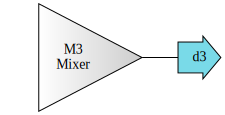

In [10]:
unit = bst.units.Mixer('M3')
bst.find.diagram()

Note that objects in the original flowsheet are not defined anymore and searching them would raise an error:

In [11]:
bst.find('M1')

LookupError: no registered item 'M1'

All Flowsheet objects are added to the `flowsheet` registry. Switching between flowsheets is easy:

In [12]:
bst.find.set_flowsheet(bst.find.flowsheet['default']) # Switch back to default flowsheet
bst.find

<MainFlowsheet: default>

As an example, the `lipidcane` biorefinery defines its own flowsheet and leaves it as the main flowsheet when you import it:

In [13]:
from biorefineries.lipidcane import system
bst.find

<MainFlowsheet: lipidcane>

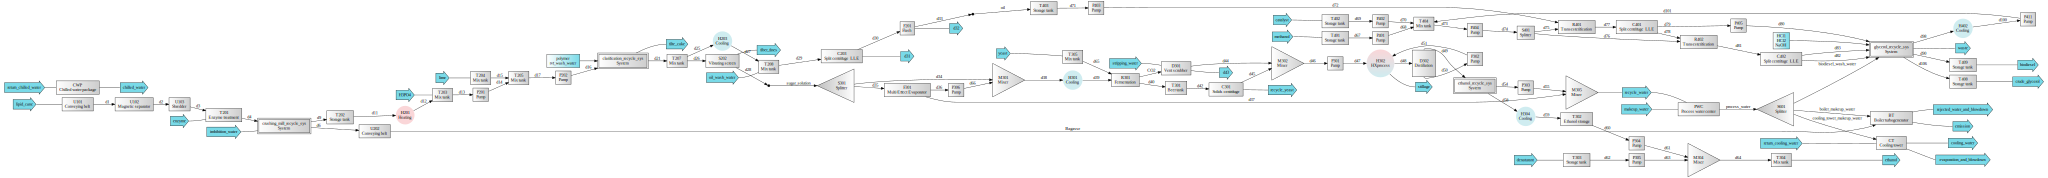

In [14]:
bst.find.diagram()